In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
#%env CUDA_VISIBLE_DEVICES=3

env: CUDA_DEVICE_ORDER=PCI_BUS_ID


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ganime.data.base import load_dataset
from ganime.utils.statistics import dataset_statistics
from ganime.model.vqgan.vqgan import VQGAN
from ganime.visualization.videos import display_images, display_videos
import tensorflow as tf
from tqdm import tqdm
tf.get_logger().setLevel('ERROR')

In [4]:
for device in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(device, True)

In [5]:
train_ds, test_ds, input_shape = load_dataset("kny_images", "../../../data", batch_size=128)

2022-05-16 08:20:32.646889: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-16 08:20:36.103012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14252 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-05-16 08:20:36.104467: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14252 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:25:00.0, compute capability: 8.6
2022-05-16 08:20:36.105526: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:2 w

In [6]:
strategy = tf.distribute.MirroredStrategy()

In [7]:
train_mean, train_var, train_std = dataset_statistics(train_ds)

  0%|          | 0/40 [00:00<?, ?it/s]

In [8]:
next(train_ds.as_numpy_iterator())[0].shape

(128, 64, 64, 3)

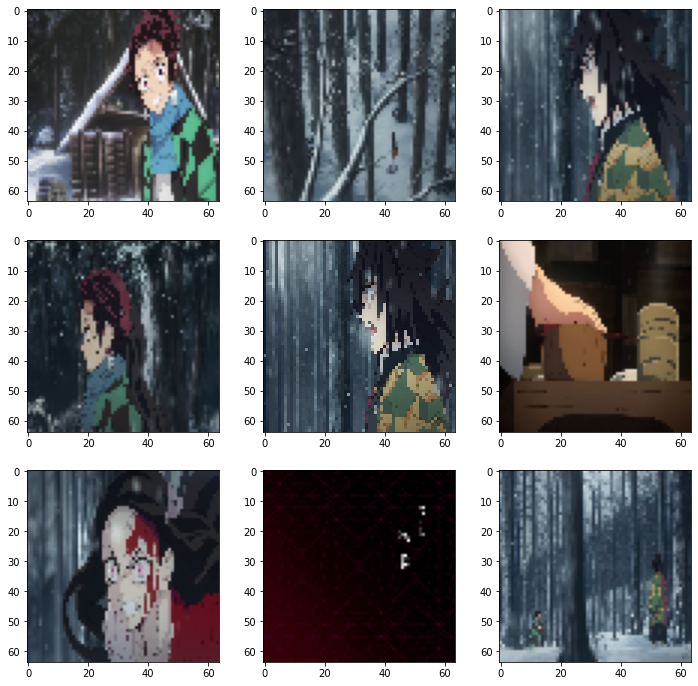

In [9]:
display_images(next(train_ds.as_numpy_iterator())[0])
plt.show()

In [10]:
with strategy.scope():
    vqgan = VQGAN(num_embeddings=256, embedding_dim=128, train_variance=train_var, disc_iter_start=40 * 200)

Working with z of shape (1, 128, 8, 8) = 8192 dimensions.


2022-05-16 08:21:08.458453: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


VQLPIPSWithDiscriminator running with hinge loss.


2022-05-16 08:21:09.870454: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [ ]:
with strategy.scope():
    vqgan.compile(gen_optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), disc_optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4))
    history = vqgan.fit(train_ds, epochs=400)

2022-05-16 08:21:13.586050: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
op: "TensorSliceDataset"
input: "Placeholder/_0"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_UINT8
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 5000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\024TensorSliceDataset:0"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 480
        }
        dim {
          size: 848
        }
        dim {
          size: 3
        }
      }
    }
  }
}



Epoch 1/400


2022-05-16 08:26:55.142528: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-16 08:26:56.072358: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-16 08:26:57.102461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-16 08:26:58.379765: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-16 08:26:59.503785: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-16 08:27:00.860615: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-16 08:27:01.511014: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


40/40 [==============================] - 420s 2s/step - loss: 12.9234 - reconstruction_loss: 8.9080 - vqvae_loss: 3.4596 - disc_loss: 0.0000e+00
Epoch 2/400
40/40 [==============================] - 8s 184ms/step - loss: 9.2588 - reconstruction_loss: 8.0855 - vqvae_loss: 1.0831 - disc_loss: 0.0000e+00
Epoch 3/400
40/40 [==============================] - 8s 186ms/step - loss: 9.7588 - reconstruction_loss: 7.7134 - vqvae_loss: 2.0448 - disc_loss: 0.0000e+00
Epoch 4/400
40/40 [==============================] - 8s 187ms/step - loss: 12.6839 - reconstruction_loss: 7.3758 - vqvae_loss: 5.1352 - disc_loss: 0.0000e+00
Epoch 5/400
40/40 [==============================] - 8s 186ms/step - loss: 13.1816 - reconstruction_loss: 7.0308 - vqvae_loss: 5.9358 - disc_loss: 0.0000e+00
Epoch 6/400
40/40 [==============================] - 8s 187ms/step - loss: 13.8877 - reconstruction_loss: 6.8092 - vqvae_loss: 6.8045 - disc_loss: 0.0000e+00
Epoch 7/400
40/40 [==============================] - 8s 189ms/step 

In [ ]:
x = next(test_ds.as_numpy_iterator())[0]
x = x.copy()
np.random.shuffle(x)
generated = vqgan(x[:10])

In [ ]:
display_images(generated)
plt.show()

In [ ]:
display_images(x)
plt.show()

In [ ]:
x2 = next(train_ds.as_numpy_iterator())[0]
x2 = x2.copy()
np.random.shuffle(x2)
generated2 = vqgan(x2[:10])

In [ ]:
display_images(generated2)
plt.show()

In [ ]:
display_images(x2)
plt.show()